# Student: Aleksander Alan Prymek

# ID: 22263179

Ensure that you have:

- encoded all categorical attributes as numerical,
- filled in all missing values
- applied a scaler to rescale features
- treated outliers appropriately
- created at least one new feature from the existing ones

Shortly describe and Justify the data preparation choices you have taken in markdown cells. Aim at not having markdown cells longer than 2-3 lines of text.

In the end, save the prepared dataset as a CSV file on your hard disk.

Input variables:
#### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



## A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./bank.csv')
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [2]:
df_original = df.copy()

## B. Process and Encode the Categorical Features

Categorical features:
- job,
- marital,
- education,
- contact,
- month,
- poutcome, 
- default, 
- housing, 
- loan, and 
- subscribed.

In [3]:
print(f"job: {df['job'].unique()}")
print(f"marital: {df['marital'].unique()}")
print(f"education: {df['education'].unique()}")
print(f"contact: {df['contact'].unique()}")
print(f"month: {df['month'].unique()}")
print(f"poutcome: {df['poutcome'].unique()}")
print(f"default: {df['default'].unique()}")
print(f"housing: {df['housing'].unique()}")
print(f"loan: {df['loan'].unique()}")
print(f"subscribed: {df['subscribed'].unique()}")

job: ['technician' 'retired' 'blue-collar' 'self-employed' 'services'
 'management' 'admin.' 'unemployed' 'student' 'entrepreneur' 'housemaid'
 nan]
marital: ['single' 'divorced' 'married']
education: ['tertiary' 'secondary' nan 'primary']
contact: ['cellular' 'telephone' nan]
month: ['apr' 'dec' 'feb' 'jan' 'mar' 'may' 'nov' 'oct' 'aug' 'jul' 'jun' 'sep']
poutcome: ['failure' 'other' 'success' nan]
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
subscribed: ['no' 'yes']


In [4]:
df[['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'default', 'housing', 'loan', 'subscribed']].describe()

job  marital  education   contact month poutcome default  \
count         1990     2000       1896      1809  2000     1546    2000   
unique          11        3          3         2    12        3       2   
top     management  married  secondary  cellular   feb  failure      no   
freq           461     1111        995      1663   404      955    1985   

       housing  loan subscribed  
count     2000  2000       2000  
unique       2     2          2  
top         no    no         no  
freq      1037  1750       1000

### Encode Ordinal Categorical Attributes 

The ordinal columns are `month` and `education`. `education` has $104$ missing values with the most popular being "secondary" education level accounting for more than a half of the present data. We will replace the missing values with the mode value.

In [5]:
import calendar
month_mapper = {
    month.lower(): index for index, month in enumerate(calendar.month_abbr) if month
}
edu_mapper = {
    'tertiary': 0,
    'secondary': 1,
    'primary': 2,
    np.nan: 2, # replace nan with the most common value of secondary
}

df['month'] = df['month'].replace(month_mapper).astype(int)
df['education'] = df['education'].replace(edu_mapper).astype(int)
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single          2      no     2785      no   no   
1996  28.0        admin.   single          1      no      127      no   no   
1997  81.0       retired  married          2      no     1154      no   no   
1998  46.0      services  married          2      no     4343     yes   no   
1999  40.0  entrepreneur  married          1      no     6403      no   no   

        contact  day  month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16      9       327         2     -1         0      NaN   
1996   cellular   16      9      1334         2     -1         0      NaN   
1997  telephone   17      9       231         1     -1         0      NaN   
1998        NaN   20      9       185         1     -1         0      NaN   
1999   cellular   22      9       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

We will also encode the binary data columns: `default`, `housing`, `loan`, and `subscribed`. They have no NaN values.

In [6]:
mapper = {
    'no': 0,
    'yes': 1,
}

df['default'] = df['default'].replace(mapper).astype(int)
df['housing'] = df['housing'].replace(mapper).astype(int)
df['loan'] = df['loan'].replace(mapper).astype(int)
df['subscribed'] = df['subscribed'].replace(mapper).astype(int)
df.tail()

age           job  marital  education  default  balance  housing  loan  \
1995  20.0       student   single          2        0     2785        0     0   
1996  28.0        admin.   single          1        0      127        0     0   
1997  81.0       retired  married          2        0     1154        0     0   
1998  46.0      services  married          2        0     4343        1     0   
1999  40.0  entrepreneur  married          1        0     6403        0     0   

        contact  day  month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16      9       327         2     -1         0      NaN   
1996   cellular   16      9      1334         2     -1         0      NaN   
1997  telephone   17      9       231         1     -1         0      NaN   
1998        NaN   20      9       185         1     -1         0      NaN   
1999   cellular   22      9       208         2     -1         0      NaN   

      subscribed  
1995           1  
1996           1  
1997           1  
1998           1  
1999           1

### One-Hot Encode All Other Categorical Attributes

We still need to encode: `job`, `marital`, `contact`, `poutcome`. 

We can see that `job` has only $10$ missing values which is not a significant enough amount to create dummy column for NaN values alone nor to diligently find the most optimal way to fill those values, thus, we will use mode to replace NaN values, which in this case is "management".

`marital` has no missing values.

`contact` has almost as many NaN values as those equal to "telephone" while in `poutcome` almost a quarter of all values are NaN, thus we will treat NaN in those columns as separate dummy variable.

In [7]:
print('-------job-------')
print(df['job'].value_counts())
print('-------marital-------')
print(df['marital'].value_counts())
print('-------contact-------')
print(df['contact'].value_counts())
print('-------poutcome-------')
print(df['poutcome'].value_counts())
df[['job', 'marital', 'contact', 'poutcome']].describe()

-------job-------
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64
-------marital-------
married     1111
single       674
divorced     215
Name: marital, dtype: int64
-------contact-------
cellular     1663
telephone     146
Name: contact, dtype: int64
-------poutcome-------
failure    955
success    444
other      147
Name: poutcome, dtype: int64


job  marital   contact poutcome
count         1990     2000      1809     1546
unique          11        3         2        3
top     management  married  cellular  failure
freq           461     1111      1663      955

In [8]:
df['job'] = df['job'].fillna('management')

In [9]:
# first one-hot encode the categorical columns with NaNs
df = pd.get_dummies(df, columns=['marital', 'contact', 'poutcome'], dummy_na=True, drop_first=True)
df.tail()

age           job  education  default  balance  housing  loan  day  \
1995  20.0       student          2        0     2785        0     0   16   
1996  28.0        admin.          1        0      127        0     0   16   
1997  81.0       retired          2        0     1154        0     0   17   
1998  46.0      services          2        0     4343        1     0   20   
1999  40.0  entrepreneur          1        0     6403        0     0   22   

      month  duration  ...  previous  subscribed  marital_married  \
1995      9       327  ...         0           1                0   
1996      9      1334  ...         0           1                0   
1997      9       231  ...         0           1                1   
1998      9       185  ...         0           1                1   
1999      9       208  ...         0           1                1   

      marital_single  marital_nan  contact_telephone  contact_nan  \
1995               1            0                  0            0   
1996               1            0                  0            0   
1997               0            0                  1            0   
1998               0            0                  0            1   
1999               0            0                  0            0   

      poutcome_other  poutcome_success  poutcome_nan  
1995               0                 0             1  
1996               0                 0             1  
1997               0                 0             1  
1998               0                 0             1  
1999               0                 0             1  

[5 rows x 22 columns]

In [10]:
# now one-hot encode all other categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()

age  education  default  balance  housing  loan  day  month  duration  \
0  32.0          0        0      392        1     0    1      4       957   
1  39.0          1        0      688        1     1    1      4       233   
2  59.0          1        0     1035        1     1    1      4       126   
3  47.0          1        0      398        1     1    1      4       274   
4  54.0          1        0     1004        1     0    1      4       479   

   campaign  ...  job_blue-collar  job_entrepreneur  job_housemaid  \
0         2  ...                0                 0              0   
1         2  ...                0                 0              0   
2         2  ...                0                 0              0   
3         1  ...                1                 0              0   
4         1  ...                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             0            0   
2               0            1                  0             0            0   
3               0            0                  0             0            0   
4               0            1                  0             0            0   

   job_technician  job_unemployed  
0               1               0  
1               1               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 31 columns]

## C. Treatment of Missing Values in Numerical Columns

In [11]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df[numerical_columns].isna().sum()

age         12
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64

`age` has only $12$ values are missing; we will use mean value mean to fill those.

In [12]:
print(df['age'].describe())
print(f"Most frequent: {df['age'].mode()[0]} with {len(df['age'].loc[df['age'] == df['age'].mode()[0]])} occurences.")

count    1988.000000
mean       41.753018
std        12.724358
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64
Most frequent: 33.0 with 95 occurences.


In [13]:
df['age'] = df['age'].fillna(df['age'].mean())

`pdays` has $454$ missing values labelled as `-1`, which is a significant amount of missing data. To preserve the distribution of the data, the missing values will be replaced with the mean.

In [14]:
print(df['pdays'].value_counts())

-1      454
 182     68
 181     62
 92      51
 91      41
       ... 
 109      1
 43       1
 82       1
 277      1
 409      1
Name: pdays, Length: 363, dtype: int64


C:\Users\aleks\AppData\Local\Temp\ipykernel_5340\566276018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pdays'].loc[df['pdays'] == -1] = df['pdays'].mean()


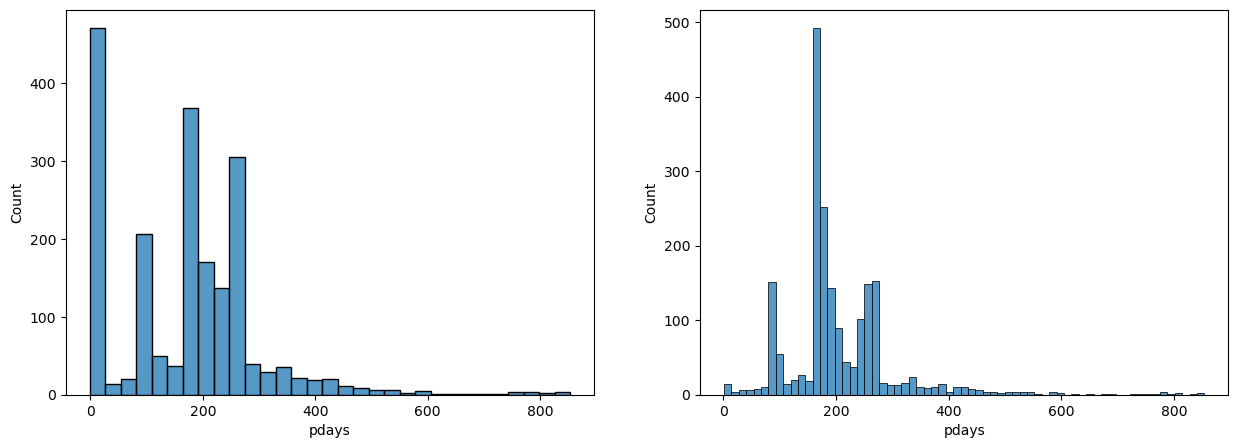

In [15]:
import seaborn as sns
df['pdays'].loc[df['pdays'] == -1] = df['pdays'].mean()
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df_original['pdays'], ax=axs[0])
sns.histplot(df['pdays'], ax=axs[1])
plt.show()

## D. Rescaling Features

Only the `day` column has no outliers and `age` column has relatively few of them, thus we will use `MinMaxScaler` for those columns. In other columns outliers are prevalent and so `RobustScaler` will be used.

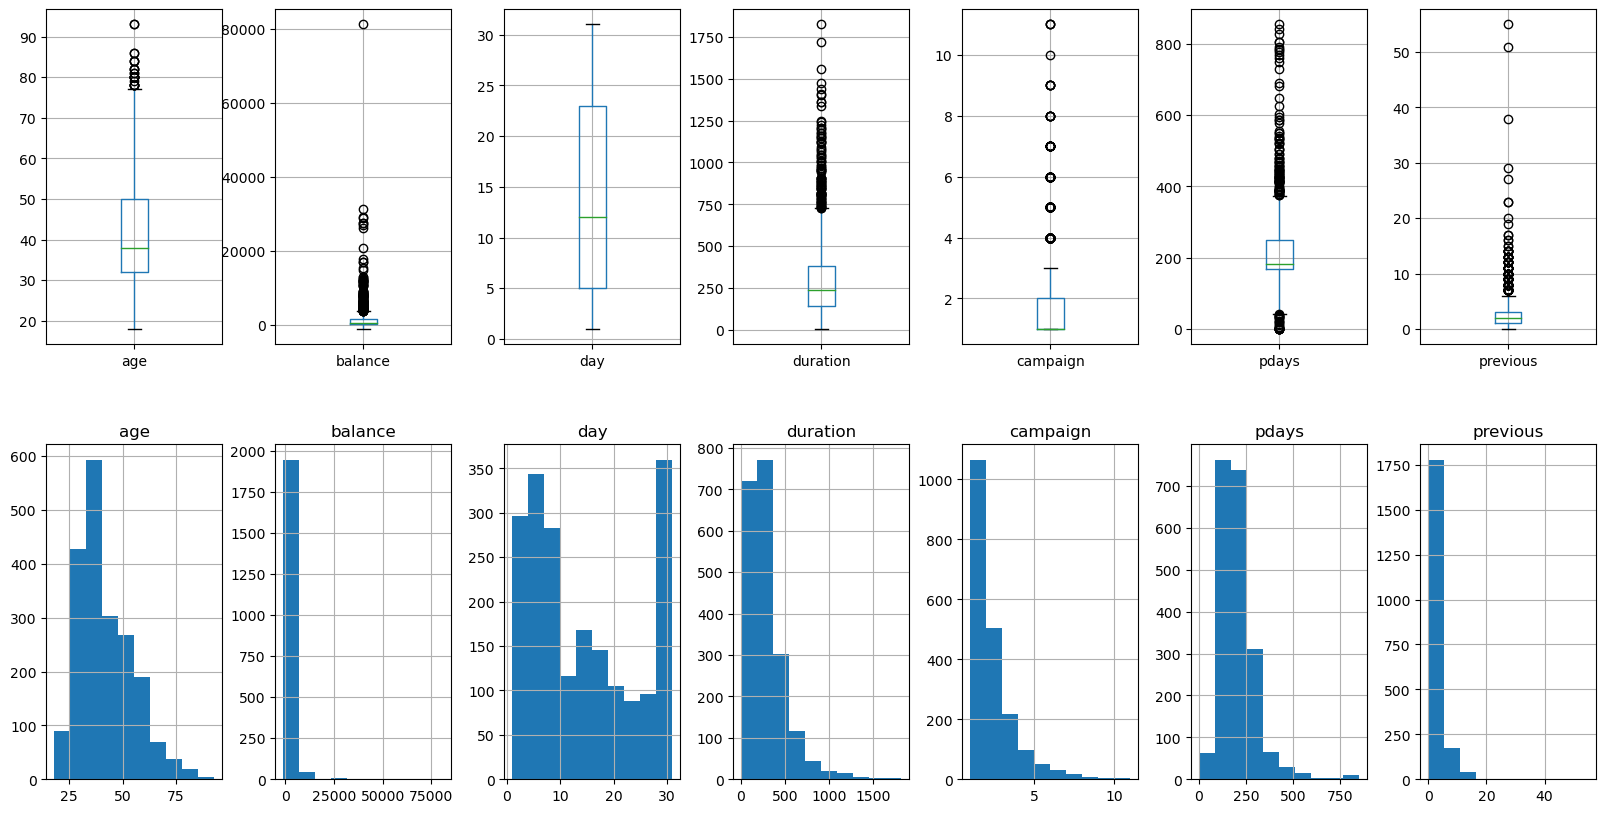

In [16]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))
for i, n in enumerate(numerical_columns):
    df.boxplot(column=n, ax=axs[0][i])
    df.hist(column=n, ax=axs[1][i])
plt.show()

All distributions save for `day` are skewed to the left so they will benefit from the log transform and so they will be treated in the next section. Here, we will only rescale the `day` feature by $31$ due to the nature of the variable.

In [17]:
df['day'] = df['day']/31

## E. Treatment of Outliers

First, however, we should attempt to make the distrbutions of relevant features more normal-like. For example, `age` will have almost Gaussian distribution after log transformation. Even though some features like `campaign` are almost like ordinal data, they will be treated in the same manner for the sake of convenience. We will rescale `age` into $[0, 1]$ by dividing by the maximum `age` value since the column has few outliers and age is defined to always be greater than zero.

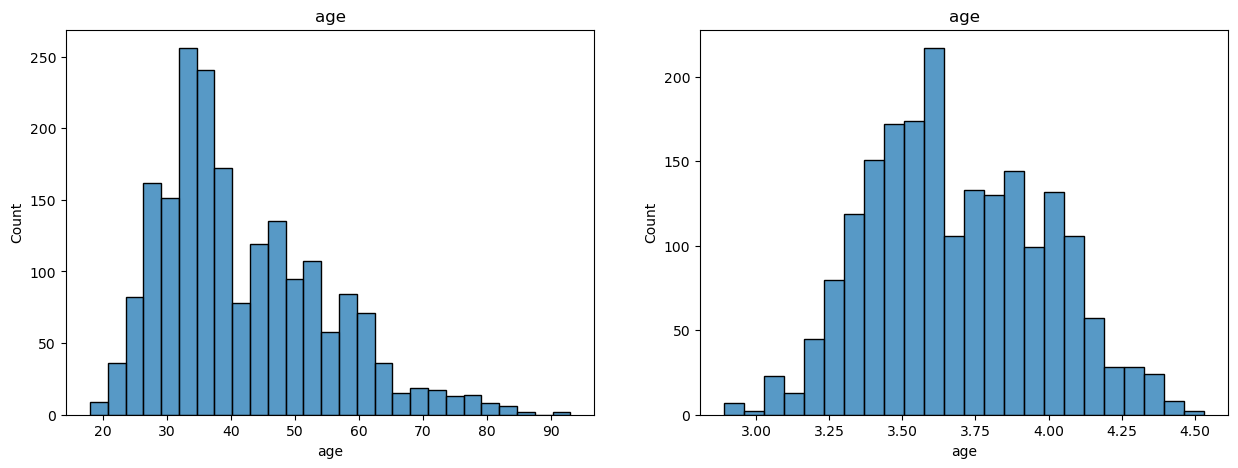

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
df['age'] = np.log(df['age'])
sns.histplot(df_original['age'], ax=axs[0])
sns.histplot(df['age'], ax=axs[1])
axs[0].set_title('age')
axs[1].set_title('age')
plt.show()

Other columns have significant number of outliers so the `RobustScaler` will be used. 

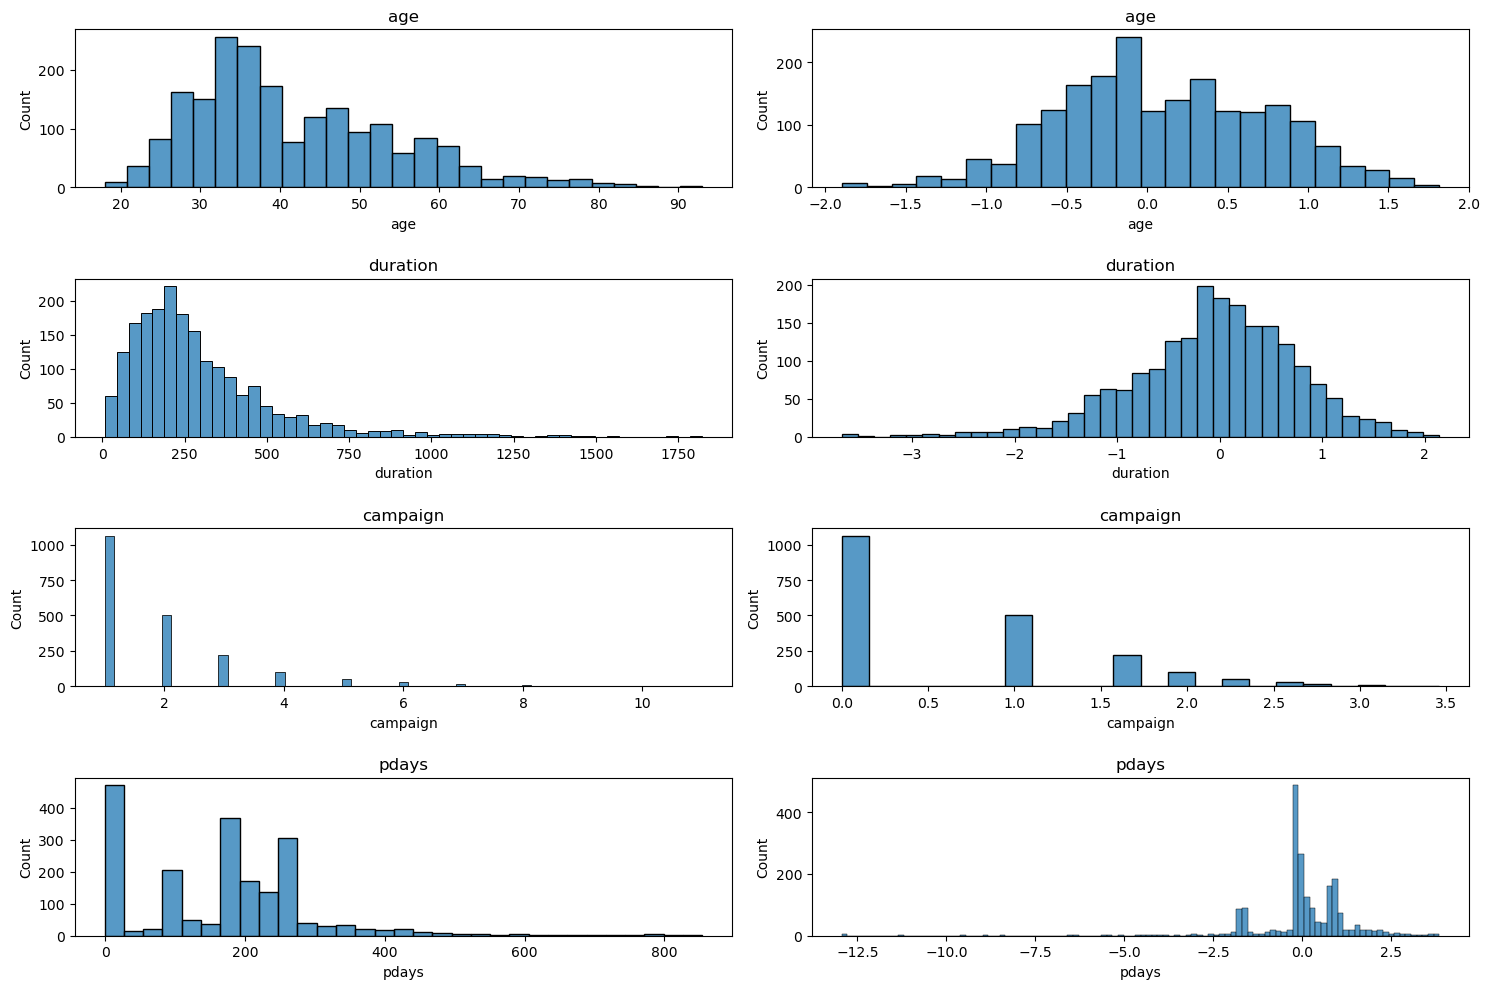

In [19]:
fig, axs = plt.subplots(4, 2, figsize=(15, 10))
for i, col in enumerate(['age', 'duration', 'campaign', 'pdays']):
    df[col] = np.log(df[col])
scaler = RobustScaler()
df[['age', 'duration', 'campaign', 'pdays']] = scaler.fit_transform(df[['age', 'duration', 'campaign', 'pdays']])
for i, col in enumerate(['age', 'duration', 'campaign', 'pdays']):
    sns.histplot(df_original[col], ax=axs[i][0])
    sns.histplot(df[col], ax=axs[i][1])
    axs[i][0].set_title(col)
    axs[i][1].set_title(col)
fig.tight_layout(h_pad=2)
plt.show()

`balance` and `previous` have values that are smaller than $1$ so we will first translate them into $[1, \infty]$ range and then apply log transform.

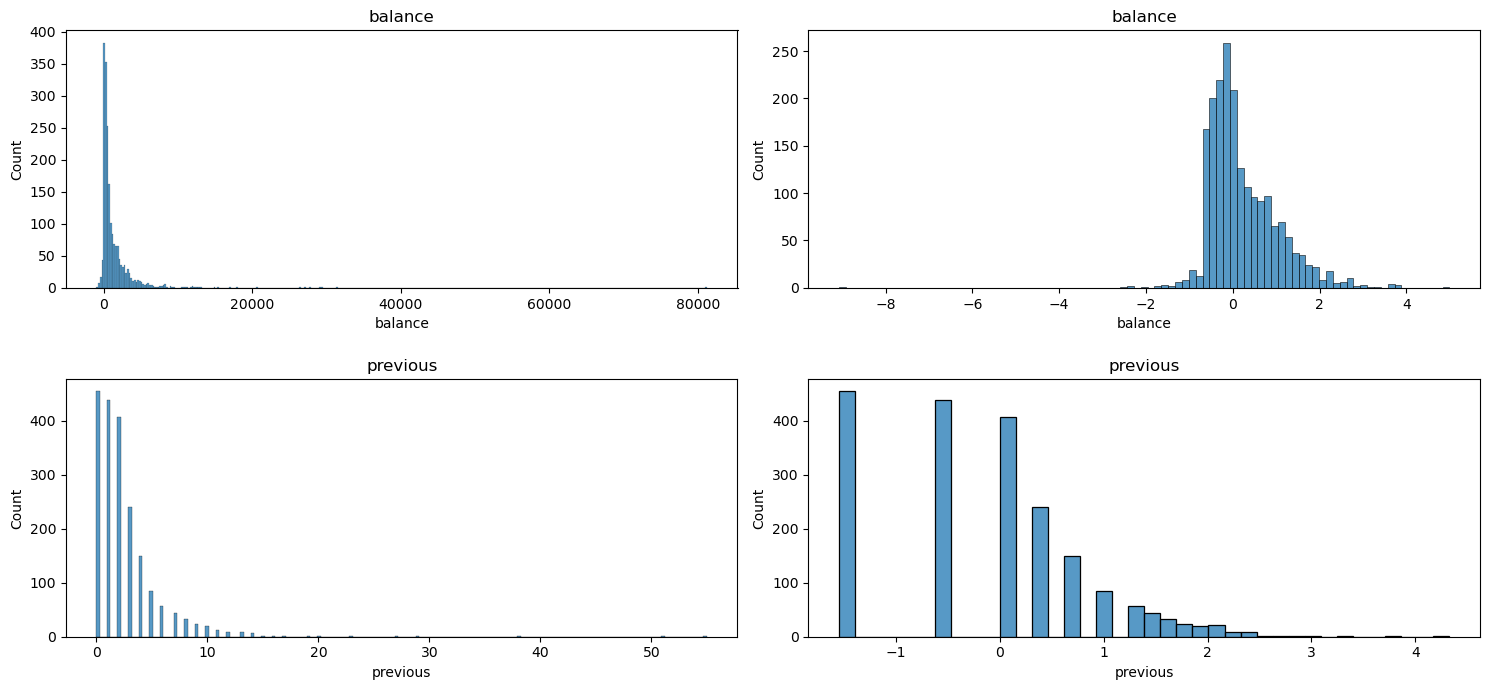

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
for i, col in enumerate(['balance', 'previous']):
    df[col] = np.log(df[col]-df[col].min()+1.1)
scaler = RobustScaler()
df[['balance', 'previous']] = scaler.fit_transform(df[['balance', 'previous']])
for i, col in enumerate(['balance', 'previous']):
    sns.histplot(df_original[col], ax=axs[i][0])
    sns.histplot(df[col], ax=axs[i][1])
    axs[i][0].set_title(col)
    axs[i][1].set_title(col)
fig.tight_layout(h_pad=2)
plt.show()

## F. Creation of Derived Features

## G. Save the Prepared Dataset

In [21]:
df.to_csv('loans_train_prepared.csv')